# 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings("ignore")
sns.set_palette("husl")
plt.style.use('seaborn-v0_8')
%matplotlib inline

# 1. Loading clustering results

In [2]:
clustered_data = pd.read_csv('../data/customer_clusters_final.csv')

print(f"{clustered_data.shape[0]:,} clients downloaded.")
print(f"Algorithm used: {clustered_data['Algorithm_Used'].iloc[0]}")
print(f"Number of clusters: {clustered_data['Cluster'].nunique()}")

4,338 clients downloaded.
Algorithm used: K-Means
Number of clusters: 7


# 2. Detailed analysis of clusters

## 2.1 Cluster size and distribution

In [3]:
cluster_summary = clustered_data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': ['mean', 'median'], # Давність останньої покупки
    'Frequency': ['mean', 'median'], # Частота покупок
    'Monetary': ['mean', 'median', 'sum'], # Загальна сума покупок
    'AvgOrderValue': ['mean', 'median'], # Середній чек
    'NumUniqueProducts': ['mean', 'median'],
    'CustomerLifespan': ['mean', 'median'] # Тривалість життя клієнта
}).round(2)

cluster_summary.columns = [f'{col[1]}_{col[0]}' if col[1] else col[0] 
                          for col in cluster_summary.columns]
cluster_summary

,count_CustomerID,mean_Recency,median_Recency,mean_Frequency,median_Frequency,mean_Monetary,median_Monetary,sum_Monetary,mean_AvgOrderValue,median_AvgOrderValue,mean_NumUniqueProducts,median_NumUniqueProducts,mean_CustomerLifespan,median_CustomerLifespan
Cluster,,,,,,,,,,,,,,
0,1564,55.56,46.0,1.89,1.0,683.75,430.00,1069378.45,33.43,17.21,35.95,26.0,36.42,0.0
1,1543,38.19,26.0,5.50,5.0,2012.35,1477.66,3105062.93,29.23,18.51,78.83,68.0,263.68,264.0
2,236,12.29,7.5,20.42,17.0,11629.68,6677.91,2744604.23,42.00,17.54,250.68,241.0,327.63,351.0
3,3,1.33,1.0,178.00,201.0,72428.07,40519.84,217284.20,12.71,7.49,1626.00,1768.0,371.67,372.0
4,985,256.17,253.0,1.51,1.0,536.90,305.10,528844.26,55.22,17.71,23.11,17.0,22.00,0.0
5,2,163.50,163.5,1.50,1.5,122828.05,122828.05,245656.10,66670.55,66670.55,2.00,2.0,102.00,102.0
6,5,9.00,8.0,51.00,55.0,195275.74,194390.79,976378.72,314.99,174.95,426.40,444.0,350.40,359.0


In [4]:
# Add a percentage of the total number of customers
total_customers = len(clustered_data)
cluster_summary['Percentage'] = (cluster_summary['count_CustomerID'] / total_customers * 100).round(1)

# Add a share of the total revenue
total_revenue = clustered_data['Monetary'].sum()
cluster_summary['Revenue_Share'] = (cluster_summary['sum_Monetary'] / total_revenue * 100).round(1)

cluster_summary

,count_CustomerID,mean_Recency,median_Recency,mean_Frequency,median_Frequency,mean_Monetary,median_Monetary,sum_Monetary,mean_AvgOrderValue,median_AvgOrderValue,mean_NumUniqueProducts,median_NumUniqueProducts,mean_CustomerLifespan,median_CustomerLifespan,Percentage,Revenue_Share
Cluster,,,,,,,,,,,,,,,,
0,1564,55.56,46.0,1.89,1.0,683.75,430.00,1069378.45,33.43,17.21,35.95,26.0,36.42,0.0,36.1,12.0
1,1543,38.19,26.0,5.50,5.0,2012.35,1477.66,3105062.93,29.23,18.51,78.83,68.0,263.68,264.0,35.6,34.9
2,236,12.29,7.5,20.42,17.0,11629.68,6677.91,2744604.23,42.00,17.54,250.68,241.0,327.63,351.0,5.4,30.9
3,3,1.33,1.0,178.00,201.0,72428.07,40519.84,217284.20,12.71,7.49,1626.00,1768.0,371.67,372.0,0.1,2.4
4,985,256.17,253.0,1.51,1.0,536.90,305.10,528844.26,55.22,17.71,23.11,17.0,22.00,0.0,22.7,6.0
5,2,163.50,163.5,1.50,1.5,122828.05,122828.05,245656.10,66670.55,66670.55,2.00,2.0,102.00,102.0,0.0,2.8
6,5,9.00,8.0,51.00,55.0,195275.74,194390.79,976378.72,314.99,174.95,426.40,444.0,350.40,359.0,0.1,11.0


count_CustomerID: кількість клієнтів у кластері,<br>

mean_Recency: середня давність останньої покупки (менше = активніше),<br>
mean_Frequency: середня кількість покупок,<br>
mean_Monetary: середня сума витрат,<br>

sum_Monetary: загальна виручка від цього кластера,<br>

mean_AvgOrderValue: середній чек,<br>
mean_NumUniqueProducts: кількість різних товарів, які клієнт купив,<br>

mean_CustomerLifespan: скільки днів пройшло між першою і останньою покупкою (життєвий цикл),<br>

Percentage: частка клієнтів у кластері (% від усіх),<br>
Revenue_Share: частка доходу цього кластера (% від загального доходу).

In [5]:
for cluster in sorted(clustered_data['Cluster'].unique()):
    data = clustered_data[clustered_data['Cluster'] == cluster]
    print(f"\nCluster {cluster}")
    print(f"Number of clients: {len(data)}")
    print(f"Average Recency (Середня давність): {data['Recency'].mean():.1f}")
    print(f"Average Frequency (Середня частота покупок): {data['Frequency'].mean():.1f}")
    print(f"Average Monetary (Середній чек): {data['Monetary'].mean():.1f}")
    print(f"Average CustomerLifespan (Середній життєвий цикл клієнта): {data['CustomerLifespan'].mean():.1f} днів")


Cluster 0
Number of clients: 1564
Average Recency (Середня давність): 55.6
Average Frequency (Середня частота покупок): 1.9
Average Monetary (Середній чек): 683.7
Average CustomerLifespan (Середній життєвий цикл клієнта): 36.4 днів

Cluster 1
Number of clients: 1543
Average Recency (Середня давність): 38.2
Average Frequency (Середня частота покупок): 5.5
Average Monetary (Середній чек): 2012.4
Average CustomerLifespan (Середній життєвий цикл клієнта): 263.7 днів

Cluster 2
Number of clients: 236
Average Recency (Середня давність): 12.3
Average Frequency (Середня частота покупок): 20.4
Average Monetary (Середній чек): 11629.7
Average CustomerLifespan (Середній життєвий цикл клієнта): 327.6 днів

Cluster 3
Number of clients: 3
Average Recency (Середня давність): 1.3
Average Frequency (Середня частота покупок): 178.0
Average Monetary (Середній чек): 72428.1
Average CustomerLifespan (Середній життєвий цикл клієнта): 371.7 днів

Cluster 4
Number of clients: 985
Average Recency (Середня дав

## 2.2 Visualisation of key metrics by cluster

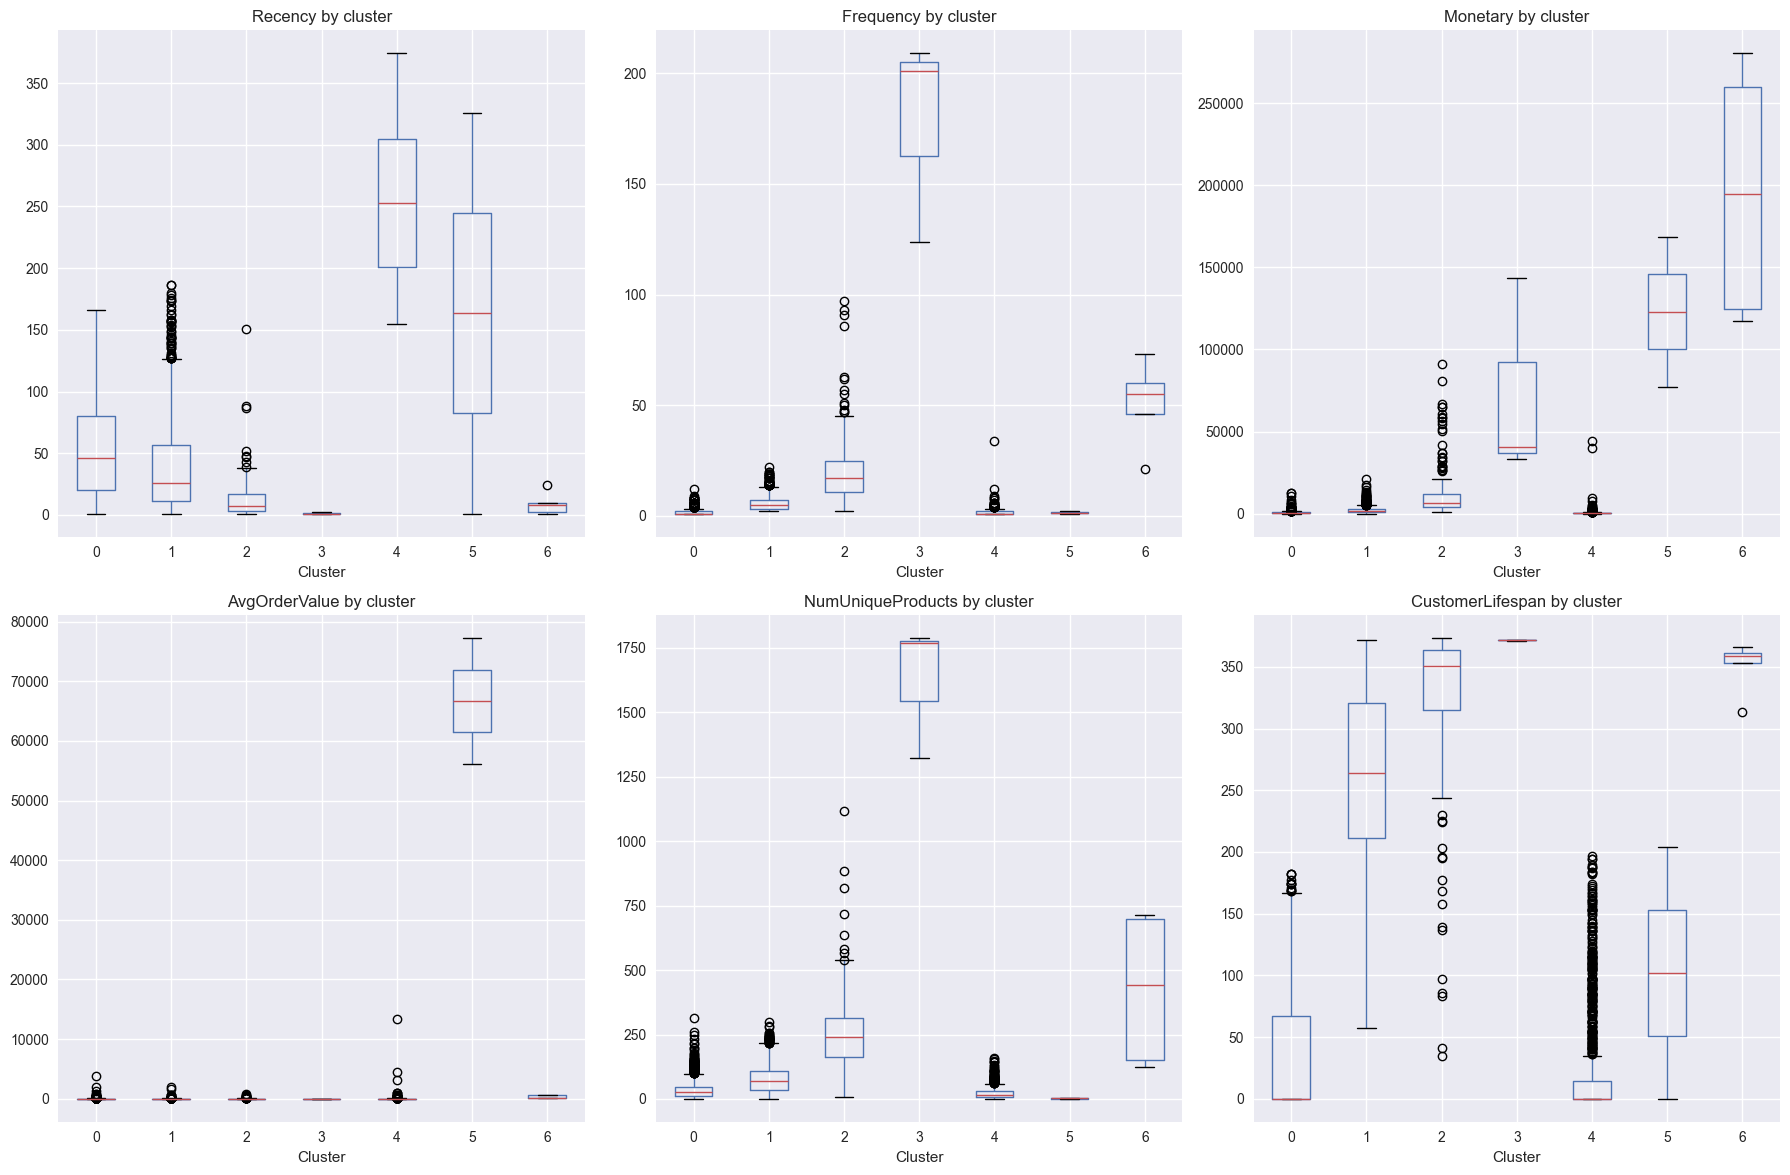

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# RFM metrics
metrics = ['Recency', 'Frequency', 'Monetary']
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    clustered_data.boxplot(column=metric, by='Cluster', ax=ax)
    ax.set_title(f'{metric} by cluster')
    ax.set_xlabel('Cluster')
    plt.suptitle('')

extra_metrics = ['AvgOrderValue', 'NumUniqueProducts', 'CustomerLifespan']
for i, metric in enumerate(extra_metrics):
    ax = axes[1, i]
    clustered_data.boxplot(column=metric, by='Cluster', ax=ax)
    ax.set_title(f'{metric} by cluster')
    ax.set_xlabel('Cluster')
    plt.suptitle('')

plt.tight_layout()
plt.show()

# 3. Business interpretation of clusters

## 3.1 Assign business profiles to clusters

In [7]:
# Global averages across all customers
r_avg = clustered_data['Recency'].mean()
f_avg = clustered_data['Frequency'].mean()
m_avg = clustered_data['Monetary'].mean()
print(f"Середня давність останньої покупки: {r_avg:.2f}, Середня частота покупок: {f_avg:.2f}, Середня сума покупок: {m_avg:.2f}")

def interpret_cluster_auto(row):
    rec = row['mean_Recency']
    freq = row['mean_Frequency']
    mon = row['mean_Monetary']

    if rec <= r_avg/2 and freq >= f_avg and mon >= m_avg*6: # Висока частота + висока вартість + свіжа покупка
        return "VIP Customers"
    
    elif mon > m_avg * 10 and freq <= 2: # Величезні чеки, але одиничні угоди
        return "Anomalous customers"
    
    elif rec <= r_avg and freq >= f_avg/2 and mon >= m_avg/2: # Середні або високі частота/вартість, недавня покупка
        return "Loyal Customers"
    
    elif freq > f_avg * 5 and mon > m_avg * 5: # Дуже висока частота або вартість, мало клієнтів
        return "Super-VIP (Whale)"
    
    elif rec > r_avg and freq < f_avg: # Колись купували, але втрачений контакт
        return "Lost Customers"
    
    elif rec * 2 > r_avg  and freq < f_avg and mon < m_avg: # Давно не купували, низькі метрики
        return "Passive Customers"
    
    elif rec < r_avg/2 and freq >= f_avg and mon >= m_avg: # Недавно почали, але вже активні
        return "New Customers"

    else:
        return "Other Customers"

Середня давність останньої покупки: 92.54, Середня частота покупок: 4.27, Середня сума покупок: 2048.69


In [8]:
cluster_summary['Auto_Profile'] = cluster_summary.apply(interpret_cluster_auto, axis=1)
cluster_summary[['count_CustomerID', 'mean_Recency', 'mean_Frequency', 'mean_Monetary', 'Auto_Profile']]

,count_CustomerID,mean_Recency,mean_Frequency,mean_Monetary,Auto_Profile
Cluster,,,,,
0,1564,55.56,1.89,683.75,Passive Customers
1,1543,38.19,5.50,2012.35,Loyal Customers
2,236,12.29,20.42,11629.68,Loyal Customers
3,3,1.33,178.00,72428.07,VIP Customers
4,985,256.17,1.51,536.90,Lost Customers
5,2,163.50,1.50,122828.05,Anomalous customers
6,5,9.00,51.00,195275.74,VIP Customers


In [9]:
# Add to the main table
clustered_data = clustered_data.merge(
    cluster_summary[['Auto_Profile']], 
    left_on='Cluster', 
    right_index=True, 
    how='left'
)
clustered_data.head()

,CustomerID,Recency,Frequency,Monetary,NumOrders,NumUniqueProducts,TotalQuantity,AvgQuantity,TotalSpent,AvgOrderValue,StdOrderValue,FirstPurchase,LastPurchase,MainCountry,CustomerLifespan,Cluster,Algorithm_Used,Auto_Profile
0,12346,326,1,77183.60,1,1,74215,74215.00,77183.60,77183.60,NaN,2011-01-18 10:01:00,2011-01-18 10:01:00,United Kingdom,0,5,K-Means,Anomalous customers
1,12347,2,7,4310.00,7,103,2458,13.51,4310.00,23.68,23.29,2010-12-07 14:57:00,2011-12-07 15:52:00,Iceland,365,1,K-Means,Loyal Customers
2,12348,75,4,1797.24,4,22,2341,75.52,1797.24,57.98,48.51,2010-12-16 19:09:00,2011-09-25 13:13:00,Finland,282,1,K-Means,Loyal Customers
3,12349,19,1,1757.55,1,73,631,8.64,1757.55,24.08,34.66,2011-11-21 09:51:00,2011-11-21 09:51:00,Italy,0,0,K-Means,Passive Customers
4,12350,310,1,334.40,1,17,197,11.59,334.40,19.67,7.28,2011-02-02 16:01:00,2011-02-02 16:01:00,Norway,0,4,K-Means,Lost Customers


## 3.2 Heatmap of key metrics per profile

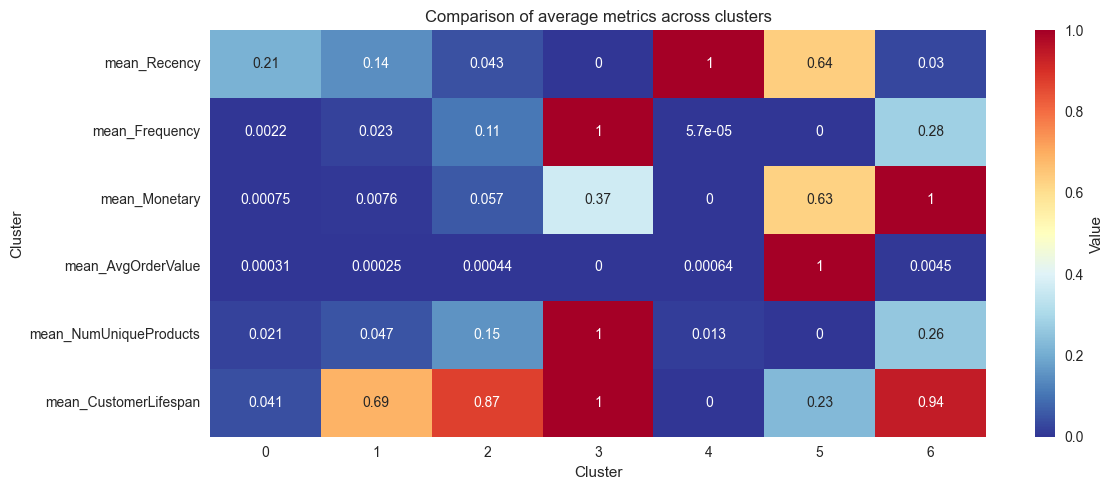

In [16]:
heatmap_data = cluster_summary[[
    'mean_Recency', 'mean_Frequency', 'mean_Monetary',
    'mean_AvgOrderValue', 'mean_NumUniqueProducts', 'mean_CustomerLifespan'
]]

normalized_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(12, 5))
sns.heatmap(normalized_data.T, annot=True, cmap="RdYlBu_r", cbar_kws={'label': 'Value'})
plt.title("Comparison of average metrics across clusters")
plt.ylabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../images/cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.3 Visualisation of profiles

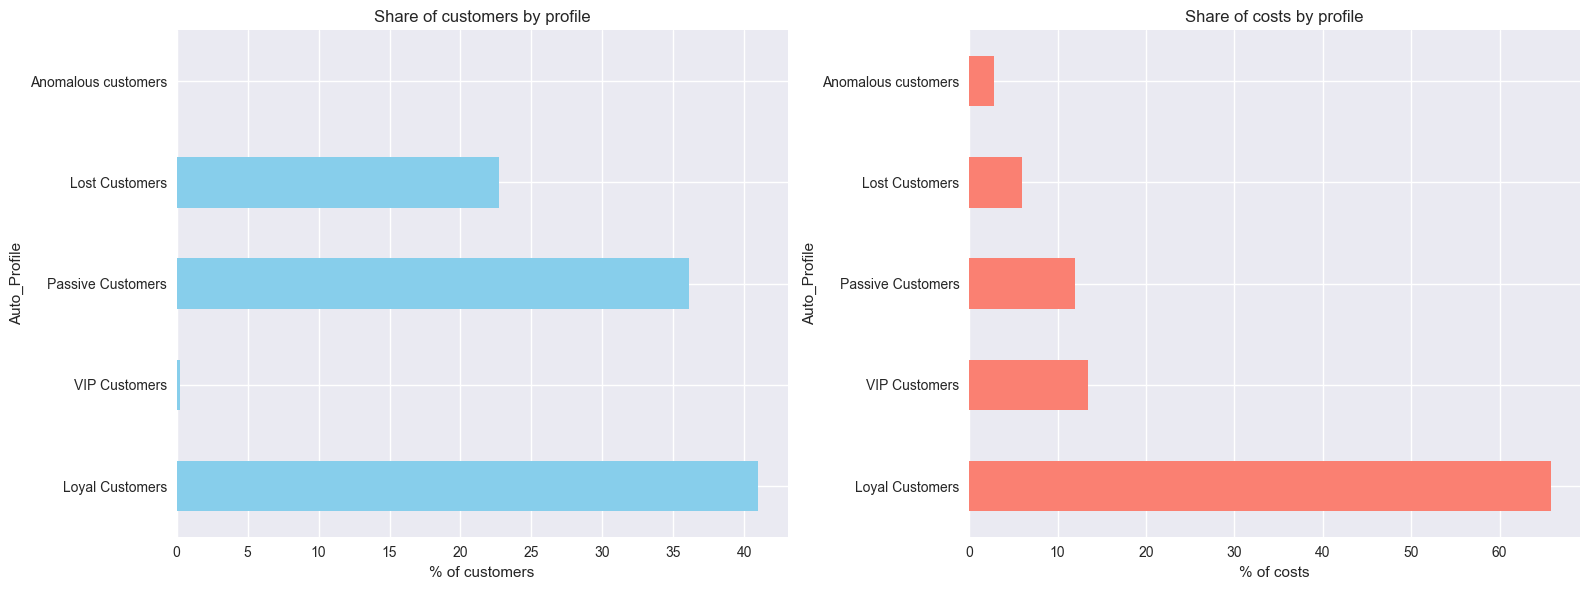

In [19]:
profile_summary = cluster_summary.groupby('Auto_Profile')[['Percentage', 'Revenue_Share']].sum().sort_values('Revenue_Share', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

profile_summary['Percentage'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Share of customers by profile')
axes[0].set_xlabel('% of customers')

profile_summary['Revenue_Share'].plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Share of costs by profile')
axes[1].set_xlabel('% of costs')

plt.tight_layout()
plt.savefig('../images/profiles_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Saving results

In [12]:
clustered_data.to_csv("../data/clustered_customers_with_profiles.csv", index=False)
cluster_summary.to_csv("../data/cluster_summary_with_profiles.csv")